## IMPORTING ESSENTIAL LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## IMPORTING THE DATASET

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

print("Imported Data")
data.head(10)

Imported Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## PLOTTING CORRELATION BETWEEN HOURS & PERCENTAGE SCORE

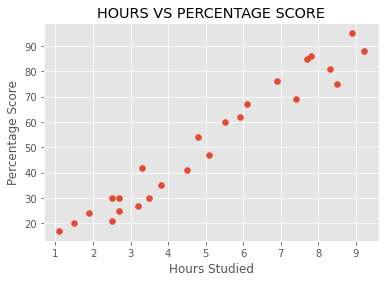

In [143]:
# plotting relation between hours & percentage scores
plt.scatter(data['Hours'],data['Scores'])
plt.title("HOURS VS PERCENTAGE SCORE")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Preparing the data
**The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)**

In [144]:
X= np.array(data[['Hours']] )
Y= np.array(data[['Scores']] )

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [145]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2)

## Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [146]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

**Finding the accuracy of model**

In [147]:
acc = linear.score(x_test, y_test)
print(acc*100)

96.1215888296713


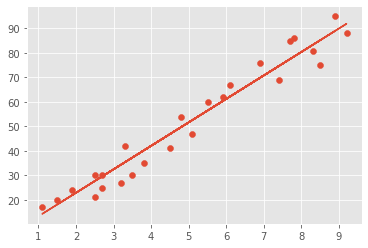

In [148]:
# Plotting the regression line
line = linear.coef_*X+linear.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [149]:
y_pred = linear.predict(x_test)


In [150]:
# Comparing Actual vs Predicted
y_test = y_test.reshape(-1)
y_pred = y_pred.reshape(-1)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,88,91.933142
1,60,56.438713
2,35,40.130462
3,95,89.055215
4,27,34.374609


In [151]:
# You can also test with your own data
hours = np.array([[9.25]])
own_pred = linear.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [92.41279629]


In [155]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.188856827893941
